In [1]:
import warnings
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.core.common import SettingWithCopyWarning

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns=999
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
arquivoBensCandidatos = '../Dados/bem_candidato_2022_BRASIL.csv'

dfBens = pd.read_csv( arquivoBensCandidatos
                     , sep=';'
                     , engine='python'
                     , encoding='latin1',skiprows=1,header=None
                     , usecols=[2,4,6,8,11,12,13,14,15,16]
                    , names=['ANO_ELEICAO','NM_TIPO_ELEICAO','DS_ELEICAO','SG_UF','SQ_CANDIDATO','NR_ORDEM_CANDIDATO',
                            'CD_TIPO_BEM_CANDIDATO','DS_BEM_CANDIDATO','DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO']
                    ,dtype={'ANO_ELEICAO':'str','NM_TIPO_ELEICAO':'str','DS_ELEICAO':'str','SG_UF':'str','SQ_CANDIDATO':'str',
                            'NR_ORDEM_CANDIDATO':'str','CD_TIPO_BEM_CANDIDATO':'str','DS_BEM_CANDIDATO':'str',
                            'DS_TIPO_BEM_CANDIDATO':'str','VR_BEM_CANDIDATO':'str'}
                    )

dfBens['VR_BEM_CANDIDATO'] = dfBens['VR_BEM_CANDIDATO'].str.replace(',', '.').astype(float)

In [4]:
pasta = '../Dados/'
arquivos = [arq for arq in os.listdir(pasta) if arq.startswith('consulta') and arq.endswith('.csv') and os.path.isfile(os.path.join(pasta, arq))]

dfCandidatos = pd.DataFrame()

for arquivo in arquivos:
    arquivoCandidatos = pasta + arquivo
    df = pd.read_csv(arquivoCandidatos
                               , sep=';'
                               , engine='python'
                               , encoding='latin1'
                               , header=0
                               , usecols=[2,4,7,10,14,15,17,18,39,46,48,50,52,54]
                               , names=['ANO_ELEICAO','NM_TIPO_ELEICAO','DS_ELEICAO','SG_UF','DS_CARGO','SQ_CANDIDATO'
                                        ,'NM_CANDIDATO','NM_URNA_CANDIDATO','SG_UF_NASCIMENTO','DS_GENERO','DS_GRAU_INSTRUCAO',
                                        'DS_ESTADO_CIVIL','DS_COR_RACA','DS_OCUPACAO'
                                        ]
                               , dtype={'ANO_ELEICAO':'str','NM_TIPO_ELEICAO':'str','DS_ELEICAO':'str',
                                        'SG_UF':'str','DS_CARGO':'str','SQ_CANDIDATO':'str','NM_CANDIDATO':'str',
                                        'NM_URNA_CANDIDATO':'str','SG_UF_NASCIMENTO':'str','DS_GENERO':'str',
                                        'DS_GRAU_INSTRUCAO':'str','DS_ESTADO_CIVIL':'str','DS_COR_RACA':'str',
                                        'DS_OCUPACAO':'str'
                                        }
                              )
    
    dfCandidatos = pd.concat([dfCandidatos , df] , ignore_index=True )


https://jc.ne10.uol.com.br/colunas/jamildo/2022/08/15064171-saiba-quem-e-o-candidato-bilionario-das-eleicoes-2022-veja-o-candidato-mais-rico.html


In [5]:
resultBensAgregado = dfBens.groupby(['SQ_CANDIDATO'],as_index=False) \
                            .agg(VLR_TOTAL_BEM=('VR_BEM_CANDIDATO','sum')) \
                            .sort_values(by=['VLR_TOTAL_BEM'],ascending=False) \
                            .astype(str)

resultBensAgregado['VLR_TOTAL_BEM_C'] = resultBensAgregado['VLR_TOTAL_BEM'].astype(float)

resultFinalBensCandidatos = pd.merge(left=resultBensAgregado
, right=dfCandidatos
, left_on='SQ_CANDIDATO'
, right_on='SQ_CANDIDATO'
)

resultFinalBensCandidatos[['ANO_ELEICAO','SQ_CANDIDATO','NM_CANDIDATO','SG_UF','DS_CARGO','VLR_TOTAL_BEM']].head(10)

,ANO_ELEICAO,SQ_CANDIDATO,NM_CANDIDATO,SG_UF,DS_CARGO,VLR_TOTAL_BEM
0,2022,90001615125,MARCOS ERMÍRIO DE MORAES,GO,2º SUPLENTE,1267950846.18
1,2022,70001723172,PAULO OCTÁVIO ALVES PEREIRA,DF,GOVERNADOR,618868229.48
2,2022,70001621520,LUIZ OSVALDO PASTORE,DF,1º SUPLENTE,453595515.7
3,2022,90001615127,JALLES FONTOURA DE SIQUEIRA,GO,1º SUPLENTE,146557178.48
4,2022,60001643110,EUNÍCIO LOPES DE OLIVEIRA,CE,DEPUTADO FEDERAL,143336007.85999998
5,2022,70001650387,JOSE GOMES FERREIRA FILHO,DF,DEPUTADO FEDERAL,128639462.9
6,2022,30001712606,OTAVIO OSCAR FAKHOURY,AP,1º SUPLENTE,123729358.52
7,2022,30001607334,ROBERTO SOARES DA SILVA,AP,DEPUTADO FEDERAL,100100000.0
8,2022,60001613000,AMARILIO PROENÇA DE MACÊDO,CE,SENADOR,98093523.0
9,2022,280001600179,PABLO HENRIQUE COSTA MARÇAL,BR,PRESIDENTE,96942541.14999999




https://g1.globo.com/politica/eleicoes/2022/eleicao-em-numeros/noticia/2022/08/16/percentual-de-candidatura-de-negros-em-2022-e-o-maior-das-ultimas-tres-eleicoes-gerais.ghtml


In [6]:
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['NÃO DIVULGÁVEL'
                                                   ,'NÃO INFORMADO'
                                                   ,'INDÍGENA'
                                                   ,'AMARELA'
                                                   ,'BRANCA'
                                                   ,'PARDA'
                                                   ,'PRETA']), 'DS_COR_RACA_TRATADA'] = 'COD_TOTAL'
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['PARDA','PRETA']), 'DS_COR_RACA_TRATADA'] = 'COR_NEGRA'
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['BRANCA']), 'DS_COR_RACA_TRATADA'] = 'COR_BRANCA'
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['AMARELA']), 'DS_COR_RACA_TRATADA'] = 'COR_AMARELA'
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['INDÍGENA']), 'DS_COR_RACA_TRATADA'] = 'COR_INDÍGENA'
dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['NÃO DIVULGÁVEL','NÃO INFORMADO']), 
                 'DS_COR_RACA_TRATADA'] = 'COR_NAO_DIVULGAVEL'

dfCandidatoCorRaca = dfCandidatos.groupby(['ANO_ELEICAO'
                                          ,'DS_COR_RACA_TRATADA'],as_index=False).agg(QTD_CANDIDATO=('SQ_CANDIDATO','count'))

dfCandidatos.loc[dfCandidatos['DS_COR_RACA'].isin(['NÃO DIVULGÁVEL'
                                                   ,'NÃO INFORMADO'
                                                   ,'INDÍGENA','AMARELA'
                                                   ,'BRANCA'
                                                   ,'PARDA'
                                                   ,'PRETA']), 'DS_COR_RACA_TRATADA'] = 'TOTAL'

dfCandidatoCorRacaoTotal = dfCandidatoCorRaca.groupby(['ANO_ELEICAO'],as_index=False) \
                                                .agg(QTD_CANDIDATO_TOTAL=('QTD_CANDIDATO','sum'))

resultCandidatoCorRaca = pd.merge(left=dfCandidatoCorRaca
, right=dfCandidatoCorRacaoTotal
, left_on='ANO_ELEICAO'
, right_on='ANO_ELEICAO'
)

resultCandidatoCorRaca['PERCENTUAL'] = (resultCandidatoCorRaca['QTD_CANDIDATO'] /
                                        resultCandidatoCorRaca['QTD_CANDIDATO_TOTAL']) * 100

resultgrafico = resultCandidatoCorRaca[resultCandidatoCorRaca['DS_COR_RACA_TRATADA'] == 'COR_NEGRA'] \
                    [['ANO_ELEICAO'
                      ,'DS_COR_RACA_TRATADA'
                      ,'PERCENTUAL']]

In [7]:
resultgrafico

,ANO_ELEICAO,DS_COR_RACA_TRATADA,PERCENTUAL
4,2014,COR_NEGRA,44.219862
9,2018,COR_NEGRA,46.497601
14,2022,COR_NEGRA,50.256078


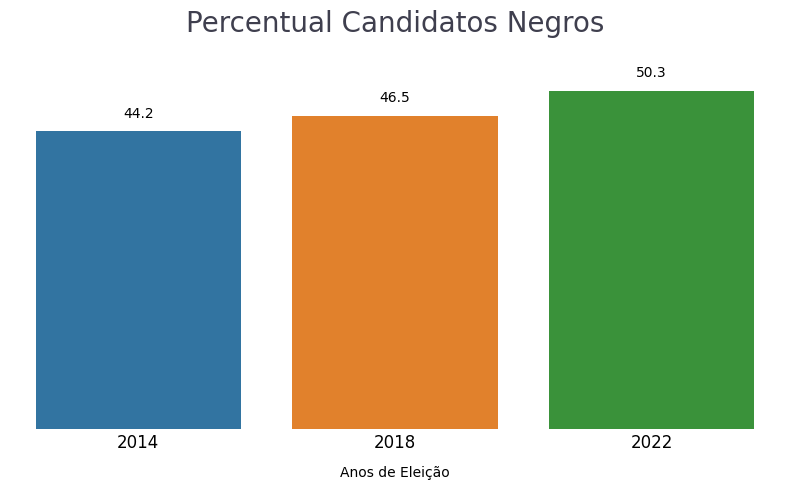

In [8]:
#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,5))
#criando novamente o gráfico
sns.barplot(x='ANO_ELEICAO',y='PERCENTUAL',data=resultgrafico,ax=ax)
#modificação do fundo
ax.set_frame_on(False)
#adicionando um título
ax.set_title('Percentual Candidatos Negros',loc='center',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
#retirando o eixo y
ax.get_yaxis().set_visible(False)
#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=0,labelsize=12,colors='black')
#ajustando o título do gráfico
ax.set_xlabel('Anos de Eleição',labelpad=10,fontdict={'fontsize':10},color='black')
#colocando os rótulos
for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:.1f}'.format(float(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10,color='black')
#plotando o gráfico
plt.tight_layout();



https://canalmynews.com.br/politica/candidatos-religiosos-declararam-patrimonio-milionario-nas-eleicoes/


In [9]:
v_primeiroNome = dfCandidatos["NM_URNA_CANDIDATO"].str.split(" ", n = 1, expand = True)

dfCandidatos['PRIMEIRO_NOME']= v_primeiroNome[0] 

dfEvangelicos = dfCandidatos[(dfCandidatos['PRIMEIRO_NOME'].isin(['PASTOR'
                                                                 ,'PASTORA'
                                                                 ,'BISPO'
                                                                 ,'BISPA'
                                                                 ,'MISSIONARIO'
                                                                 ,'MISSIONARIA'
                                                                 ,'IRMAO'
                                                                 ,'IRMA'
                                                                 ,'APOSTOLO'
                                                                 ,'APOSTOLA'])) 
                                                                 & (dfCandidatos['ANO_ELEICAO']=='2022')]

dfEvangelicos.groupby(['PRIMEIRO_NOME','ANO_ELEICAO'],as_index=False) \
                                                .agg(QTD_TOTAL_CANDIDATOS=('SQ_CANDIDATO','count')) \
                                                .sort_values(by=(['PRIMEIRO_NOME','QTD_TOTAL_CANDIDATOS']),ascending=False)

resultFinalBensCandidatosEvangelicos = pd.merge(left=resultBensAgregado
, right=dfEvangelicos
, left_on='SQ_CANDIDATO'
, right_on='SQ_CANDIDATO'
)[['SQ_CANDIDATO','SG_UF','NM_CANDIDATO','PRIMEIRO_NOME','DS_CARGO','VLR_TOTAL_BEM','VLR_TOTAL_BEM_C']]

resultFinalBensCandidatosEvangelicos.sort_values(by='VLR_TOTAL_BEM_C',ascending=False)[['SQ_CANDIDATO'
                                                                                ,'SG_UF'
                                                                                ,'NM_CANDIDATO'
                                                                                ,'PRIMEIRO_NOME'
                                                                                ,'DS_CARGO'
                                                                                ,'VLR_TOTAL_BEM']].head(10)

,SQ_CANDIDATO,SG_UF,NM_CANDIDATO,PRIMEIRO_NOME,DS_CARGO,VLR_TOTAL_BEM
0,60001723404,CE,EDSON BEZERRA DA COSTA,PASTOR,DEPUTADO FEDERAL,2800000.0
1,60001636093,CE,EDSON BEZERRA DA COSTA,PASTOR,DEPUTADO FEDERAL,2800000.0
2,70001677311,DF,EGMAR TAVARES DA SILVA,PASTOR,2º SUPLENTE,1990550.0
3,60001608850,CE,VANESSA FALCÃO DE SOUZA CASTELO LIMA,BISPA,DEPUTADO FEDERAL,1914132.44
4,90001651344,GO,GIOVANNA DE ALMEIDA LOVAGLIO,PASTORA,DEPUTADO FEDERAL,1394497.68
5,10001649318,AC,ELISEU SOARES MOREIRA,PASTOR,DEPUTADO ESTADUAL,1050000.0
6,90001643097,GO,MARIA HELENA SANTANA,PASTORA,DEPUTADO ESTADUAL,1000000.0
7,50001620031,BA,EWERTON CARNEIRO DA COSTA,PASTOR,DEPUTADO ESTADUAL,825080.5399999999
8,50001620007,BA,LUCIANO FRED BRAGA PENHA,PASTOR,DEPUTADO ESTADUAL,752595.52
9,50001605354,BA,ONASIS DA TRINDADE DE BRITO,BISPO,DEPUTADO FEDERAL,750000.0




https://oglobo.globo.com/politica/eleicoes-2022/noticia/2022/08/tres-a-cada-dez-candidatos-a-governador-nasceram-fora-do-estado-que-tentam-comandar.ghtml?utm_source=globo.com&utm_medium=oglobo


In [10]:
resultSetCandidatoGovernador = dfCandidatos[(dfCandidatos['ANO_ELEICAO']=='2022') 
             & (dfCandidatos['DS_CARGO']=='GOVERNADOR')][['SQ_CANDIDATO'
                                                          ,'NM_CANDIDATO'
                                                          ,'DS_CARGO'
                                                          ,'SG_UF'
                                                          ,'SG_UF_NASCIMENTO']]

resultSetCandidatoGovernador.loc[resultSetCandidatoGovernador['SG_UF'] == resultSetCandidatoGovernador['SG_UF_NASCIMENTO'], 
                                 'COMPARACAO'] = 'NASCIDO NO ESTADO'
resultSetCandidatoGovernador.loc[resultSetCandidatoGovernador['SG_UF'] != resultSetCandidatoGovernador['SG_UF_NASCIMENTO'], 
                                 'COMPARACAO'] = 'FORASTEIRO'

dfCandidatosGovernadorTotal = dfCandidatos[(dfCandidatos['ANO_ELEICAO']=='2022') & (dfCandidatos['DS_CARGO']=='GOVERNADOR')] \
                                .groupby(['ANO_ELEICAO','DS_CARGO'],as_index=False) \
                                .agg(QTD_CANDIDATO_GOVERNADOR=('SQ_CANDIDATO','count'))

resultSetCandidatoGovernador = resultSetCandidatoGovernador.groupby(['DS_CARGO','COMPARACAO'],as_index=False) \
                                .agg(QTDCANDIDATO=('COMPARACAO','count'))

resultFinalCandidatosGovernador = pd.merge(left=resultSetCandidatoGovernador
                                            , right=dfCandidatosGovernadorTotal
                                            , left_on='DS_CARGO'
                                            , right_on='DS_CARGO'
                                            )[['ANO_ELEICAO'
                                               ,'DS_CARGO'
                                               ,'COMPARACAO'
                                               ,'QTDCANDIDATO'
                                               ,'QTD_CANDIDATO_GOVERNADOR']]

resultFinalCandidatosGovernador['PERCENTUAL'] = (resultFinalCandidatosGovernador['QTDCANDIDATO'] 
                                                 / resultFinalCandidatosGovernador['QTD_CANDIDATO_GOVERNADOR']) * 100

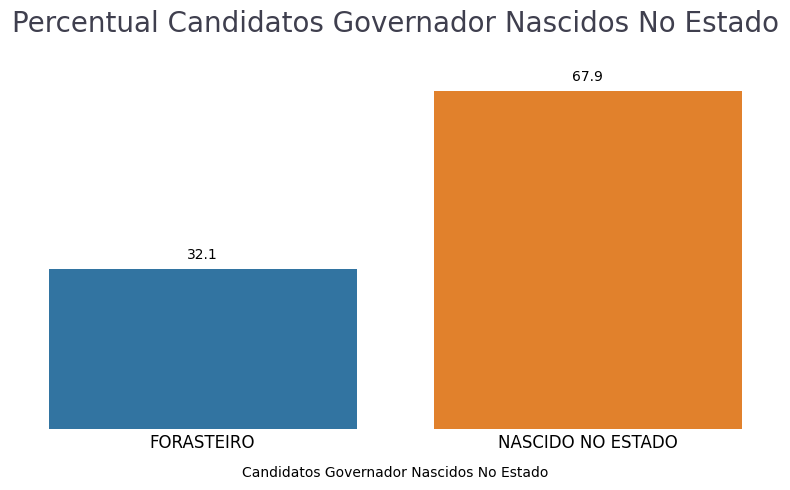

In [11]:
#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,5))
#criando novamente o gráfico
sns.barplot(x='COMPARACAO',y='PERCENTUAL',data=resultFinalCandidatosGovernador,ax=ax)
#modificação do fundo
ax.set_frame_on(False)
#adicionando um título
ax.set_title('Percentual Candidatos Governador Nascidos No Estado',loc='center',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
#retirando o eixo y
ax.get_yaxis().set_visible(False)
#retirado os ticks do eixo x
ax.tick_params(axis='x',length=0,labelsize=12,colors='black')
#ajustando o título do gráfico
ax.set_xlabel('Candidatos Governador Nascidos No Estado',labelpad=10,fontdict={'fontsize':10},color='black')
#colocando os rótulos
for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:.1f}'.format(float(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10,color='black')
#plotando o gráfico
plt.tight_layout();




https://g1.globo.com/politica/eleicoes/2020/eleicao-em-numeros/noticia/2022/08/17/eleicoes-2022-38percent-dos-candidatos-nao-declaram-patrimonio-12percent-sao-milionarios-e-1-e-bilionario.ghtml


In [12]:
resultFinalBensCandidatosDeclarado = pd.merge(left=dfCandidatos
                                            , right=resultBensAgregado
                                            , left_on='SQ_CANDIDATO'
                                            , right_on='SQ_CANDIDATO'
                                            , how='left'
                                            )[['ANO_ELEICAO'
                                               ,'SQ_CANDIDATO'
                                               ,'NM_CANDIDATO'
                                               ,'DS_CARGO'
                                               ,'VLR_TOTAL_BEM'
                                               ,'VLR_TOTAL_BEM_C']]

resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].fillna(0,inplace=True)
resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].fillna(0,inplace=True)

resultFinalBensCandidatosDeclarado = resultFinalBensCandidatosDeclarado[
                                    resultFinalBensCandidatosDeclarado['ANO_ELEICAO']=='2022']

resultFinalBensCandidatosDeclarado.loc[resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) == 0
                                    , 'COMPARACAO'] = 'NÃO DECLAROU BEM'

resultFinalBensCandidatosDeclarado.loc[((resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) >= float(1)) 
                                    & (resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) < float(1000000)))
                                    ,'COMPARACAO'] = 'RICO'

resultFinalBensCandidatosDeclarado.loc[((resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) 
                                         >= float(1000000)) 
                                    & (resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) < float(1000000000)))
                                    , 'COMPARACAO'] = 'MILIONARIO'
resultFinalBensCandidatosDeclarado.loc[((resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) 
                                         >= float(1000000000))                                       
                                & (resultFinalBensCandidatosDeclarado['VLR_TOTAL_BEM_C'].astype(float) < float(1000000000000)))
                                , 'COMPARACAO'] = 'BILIONARIO'

resultFinalBensCandidatosDeclaradoAgregado = resultFinalBensCandidatosDeclarado.groupby(['COMPARACAO','ANO_ELEICAO']
                                    ,as_index=False).agg(QTD_CANDIDATO=('SQ_CANDIDATO','count'),VLR_TOTAL_BENS=('VLR_TOTAL_BEM_C','sum'))

resultFinalBensCandidatosDeclaradoAgregado = pd.merge(left=resultFinalBensCandidatosDeclaradoAgregado
, right=dfCandidatoCorRacaoTotal
, left_on='ANO_ELEICAO'
, right_on='ANO_ELEICAO'
)[['ANO_ELEICAO','COMPARACAO','QTD_CANDIDATO','VLR_TOTAL_BENS','QTD_CANDIDATO_TOTAL']]

resultFinalBensCandidatosDeclaradoAgregado['PERCENTUAL'] = (resultFinalBensCandidatosDeclaradoAgregado['QTD_CANDIDATO'] 
                                            / resultFinalBensCandidatosDeclaradoAgregado['QTD_CANDIDATO_TOTAL']) * 100

In [13]:
resultFinalBensCandidatosDeclaradoAgregado

,ANO_ELEICAO,COMPARACAO,QTD_CANDIDATO,VLR_TOTAL_BENS,QTD_CANDIDATO_TOTAL,PERCENTUAL
0,2022,BILIONARIO,1,1.267951e+09,29288,0.003414
1,2022,MILIONARIO,855,5.046695e+09,29288,2.919284
2,2022,NÃO DECLAROU BEM,24762,0.000000e+00,29288,84.546572
3,2022,RICO,3663,9.564929e+08,29288,12.506829


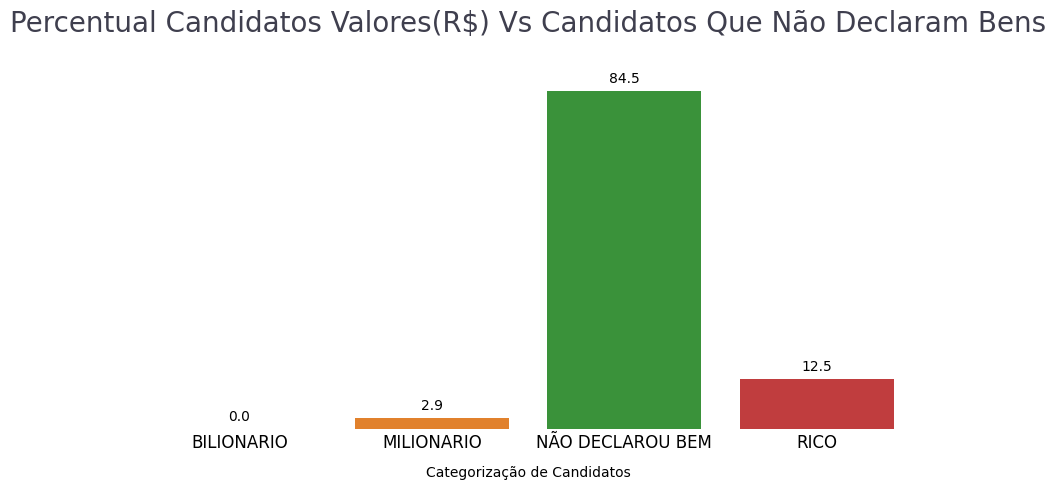

In [14]:
#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,5))
#criando novamente o gráfico
sns.barplot(x='COMPARACAO',y='PERCENTUAL',data=resultFinalBensCandidatosDeclaradoAgregado,ax=ax)
#modificação do fundo
ax.set_frame_on(False)
#adicionando um título
ax.set_title('Percentual Candidatos Valores(R$) Vs Candidatos Que Não Declaram Bens',loc='center',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
#retirando o eixo y
ax.get_yaxis().set_visible(False)
#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=0,labelsize=12,colors='black')
#ajustando o título do gráfico
ax.set_xlabel('Categorização de Candidatos',labelpad=10,fontdict={'fontsize':10},color='black')
#colocando os rótulos
for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:.1f}'.format(float(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10,color='black')
#plotando o gráfico
plt.tight_layout();

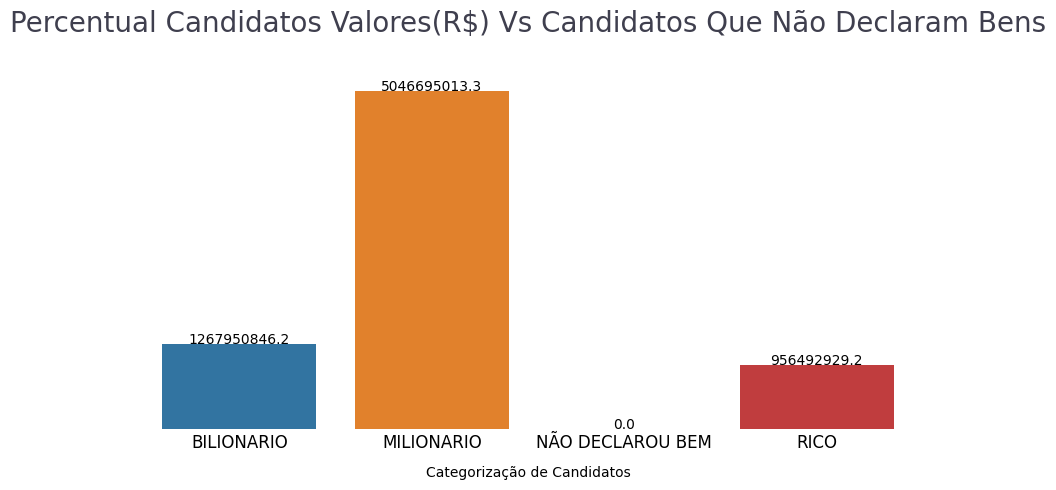

In [15]:
#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(8,5))
#criando novamente o gráfico
sns.barplot(x='COMPARACAO',y='VLR_TOTAL_BENS',data=resultFinalBensCandidatosDeclaradoAgregado,ax=ax)
#modificação do fundo
ax.set_frame_on(False)
#adicionando um título
ax.set_title('Percentual Candidatos Valores(R$) Vs Candidatos Que Não Declaram Bens',loc='center',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
#retirando o eixo y
ax.get_yaxis().set_visible(False)
#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=0,labelsize=12,colors='black')
#ajustando o título do gráfico
ax.set_xlabel('Categorização de Candidatos',labelpad=10,fontdict={'fontsize':10},color='black')
#colocando os rótulos
for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:.1f}'.format(float(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10,color='black')
#plotando o gráfico
plt.tight_layout();